In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import sklearn.metrics as metrics
from sklearn.model_selection import train_test_split, StratifiedKFold
from sklearn.ensemble import IsolationForest

%matplotlib inline
plt.style.use('fivethirtyeight')
import warnings
warnings.filterwarnings("ignore", category=FutureWarning)

In [2]:
df = pd.read_csv('data/Task2data.csv')
y = df.pop('fraud')

In [3]:
X_main, X_holdout, y_main, y_holdout = train_test_split(df, y, random_state=7, stratify=y)

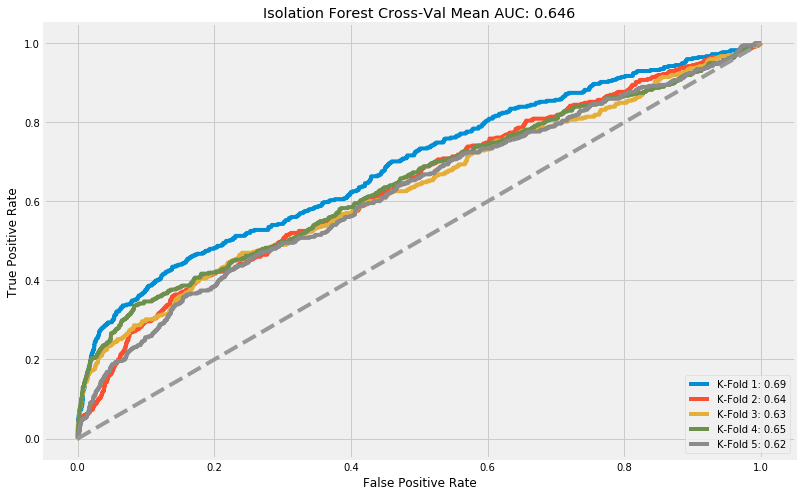

In [4]:
fig, ax = plt.subplots(figsize=(12, 8))

kf = StratifiedKFold(n_splits=5, shuffle=True)
IF = IsolationForest(behaviour='new', contamination=0.025)
AUCs = []

for i, (train_index, test_index) in enumerate(kf.split(X_main, y_main)):
    X_train, X_test = X_main.iloc[train_index], X_main.iloc[test_index]
    y_train, y_test = y_main.iloc[train_index], y_main.iloc[test_index]

    IF.fit(X_train, y_train)
    preds = -IF.score_samples(X_test)
    #preds[preds == -1] = 0    

    fpr, tpr, thresholds = metrics.roc_curve(y_test.values, preds)
    auc = metrics.auc(fpr, tpr)
    ax.plot(fpr, tpr, label=f'K-Fold {i+1}: {round(auc, 2)}')
    AUCs.append(auc)
    
mean_auc = round(np.mean(AUCs), 3)
ax.set_title(f'Isolation Forest Cross-Val Mean AUC: {mean_auc}')  
ax.set_xlabel('False Positive Rate')
ax.set_ylabel('True Positive Rate')
ax.legend(loc='lower right')
ax.plot([0, 1], [0, 1], '--', color=(0.6, 0.6, 0.6), label='Random')